# This is an introductory NetworkX Jupyter *notebook* and ways to connect it with pyECSS, Pytorch Geometric and Tensorflow geometric graphs


## Copyright 2022 Dr. George Papagiannakis, papagian@csd.uoc.gr
### All Rights Reserved

### University of Crete & Foundation for Research & Technology - Hellas (FORTH)


### Installation instructions of NetworkX
- https://networkx.org/documentation/stable/install.html 
    - `pip install networkx`
    - `pip install pygraphviz pydot pyyaml gdal lxml`
    - `python -c "import networkx; print(networkx.__version__)"`
### NetworkX tutorial
- https://networkx.org/documentation/stable/tutorial.html 

In [1]:
# NetworkX basic import
import networkx as nx
import math
import matplotlib.pyplot as plt


### Graph creation

In [2]:
# By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In
# NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized
# node object, etc.
G = nx.Graph()
G2 = nx.cubical_graph()

### Graph population

In [3]:
G.add_edge(1, 2) # default edge data=1
G.add_node(math.cos)
K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
G.add_node(K3)
G.number_of_nodes()

4

### Graph drawing

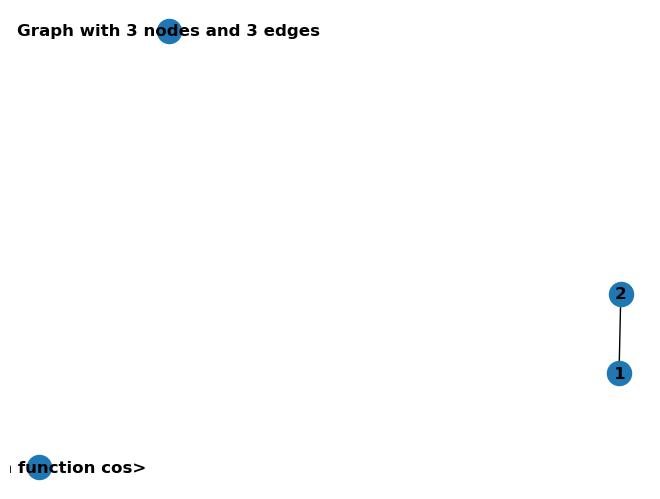

In [4]:
nx.draw(G,with_labels=True, font_weight='bold')

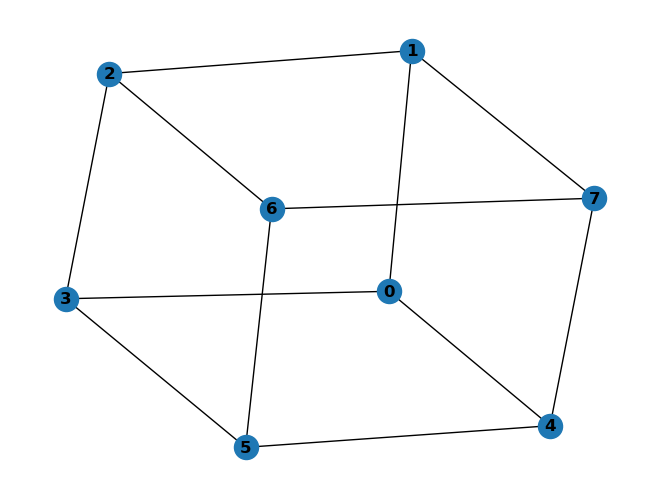

In [5]:
nx.draw(G2, with_labels=True, font_weight='bold')

### Experiment with PyECSS and NetworkX

In [6]:
from pyECSS.Entity import Entity
from pyECSS.Component import Component, BasicTransform, Camera, RenderMesh, CompNullIterator, BasicTransformDecorator

gameObject = Entity("root") 
gameObject2 = Entity("gameObject2", "Group", 10)
gameObject3 = Entity("gameObject3", "Group", 11)
gameComponent = BasicTransform("Transform", "TRS", 200)
gameComponent2 = BasicTransform()
        
gameObject.add(gameObject2)
gameObject2.add(gameComponent)
gameObject2.add(gameObject3)
gameObject.add(gameComponent2)
        
print(gameObject) #prints root
gameObject.print() #prints recursively all root children


 Entity name: root, type: Entity, id: 208011490776159486366196024308155778182, parent: None (root node)
 _______________________________________________________________ 

 Entity name: gameObject2, type: Group, id: 10, parent: root
 _______________________________________________________________ 

 BasicTransform name: Transform, type: TRS, id: 200, parent: gameObject2, 
l2world: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], 
l2cam: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], 
trs: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

 BasicTransform name: Transform, type: TRS, id: 200, parent: gameObject2
 ______________________________________________________________

 Entity name: gameObject3, type: Group, id: 11, parent: gameObject2
 _______________________________________________________________ 

 BasicTransform name: BasicTransform, type: BasicTransform, id: 208011560496942498918813106626832073862, parent: root, 
l2world: 
[[1. 0. 0.

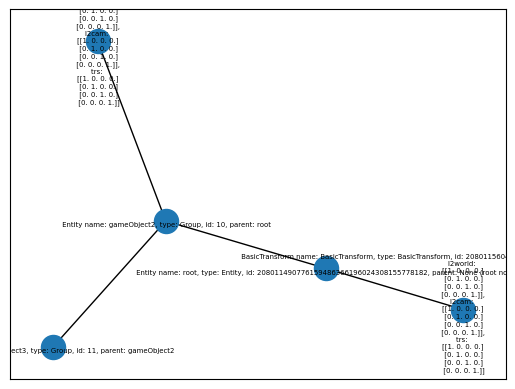

In [7]:
G3 = nx.Graph()
G3.add_node(gameObject)
G3.add_node(gameObject2)
G3.add_node(gameObject3)
G3.add_edge(gameObject,gameObject2)
G3.add_edge(gameObject2,gameComponent)
G3.add_edge(gameObject2,gameObject3)
G3.add_edge(gameObject,gameComponent2)
nx.draw_networkx(G3, with_labels=True, font_size=5)

## Create a pyTorch graph based on pyECSS via NetworkX

In [11]:
import matplotlib.pyplot as plt
import torch_geometric.utils as nxu
import seaborn as sns
%matplotlib inline
import torch
from torch_geometric.data import Data

In [13]:
tG = nxu.from_networkx(G3)
print(tG)

Data(edge_index=[2, 8], num_nodes=5)


In [14]:
tG.is_directed()

False

### Create a pyTorch graph based on a generic networkX graph

tensor([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


/var/folders/sw/fcpngc0n72zdpwblgv65nf3r0000gn/T/ipykernel_41745/1634484173.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = torch.tensor(nx.adjacency_matrix(G).todense())


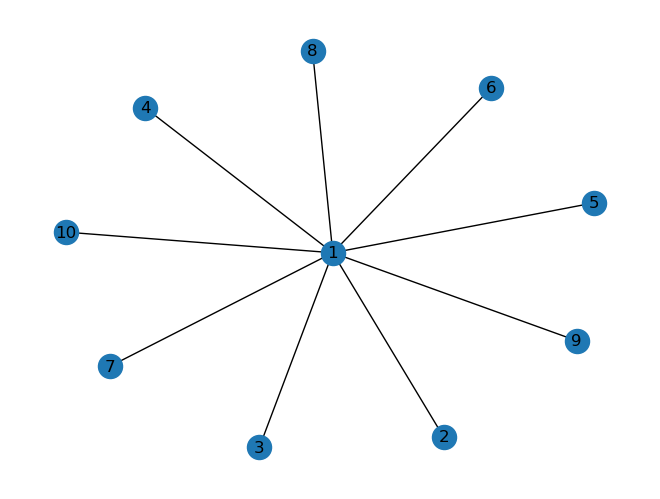

In [15]:
# load a networkx graph in pytorch in python

import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# create a networkx graph
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])

# create a pytorch tensor
A = torch.tensor(nx.adjacency_matrix(G).todense())

# print the tensor
print(A)

# print the networkx graph
nx.draw(G, with_labels=True)
plt.show()

## Create a tensorflow_geometric graph based on pyECSS via NetworkX

In [ ]:
# load a networkx graph in tensorflow_geometric in python
# this is untested currently on Apple M1 platforms

import networkx as nx
import tensorflow as tf
import tensorflow_geometric as tfg

#G = nx.read_edgelist('data/edgelist.txt')
G = nx.read_edgelist(G3)

# convert to tensorflow_geometric graph

graph = tfg.data.Graph(
    x=tf.ones(shape=(len(G), 1)),
    edge_index=tf.convert_to_tensor(list(G.edges), dtype=tf.int64),
    edge_attr=tf.ones(shape=(len(G.edges), 1)),
    y=tf.ones(shape=(len(G), 1))
)

# print graph

print(graph)

# print graph attributes

print(graph.x)
print(graph.edge_index)
print(graph.edge_attr)
print(graph.y)

# print graph nodes

print(graph.nodes)

# print graph edges

print(graph.edges)

# print graph adjacency matrix

print(graph.adjacency_mat

### create a tensorflow_graphics graph based on a networkX graph

In [ ]:
# load a networkx graph in tensorflow graphics in python and print it
# this is untested currently on Apple M1 platforms


# import the necessary packages
import numpy as np
import networkx as nx
import tensorflow as tf
import tensorflow_graphics as tfg
import matplotlib.pyplot as plt

# create a networkx graph
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])

# convert the networkx graph to a tensorflow graphics graph
graph = tfg.data.convert_graph_networkx_to_data_structures(G)

# print the graph
print(graph)

# plot the graph
nx.draw(G, with_labels=True)
plt.show()